Author: WenJun Cen<br>
Date: 12/09/2019<br>
File: Airbnb - Kaggle<br>

# Dataset Description 

Where you got it?

- The dataset came from Kaggle under the dataset section, which titles NYC Airbnb Open Data. The dataset can be found from https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data. 

Why the source is reliable?

- The source is reliable because it is open data provided by Airbnb, and the dataset, according to Kaggle, originates from insideairbnb.com.

How it was gathered (study info, participants, etc.)?

- According to Inside Airbnb, the data was made publicly through its internal services. The data was cleansed and aggregated by Inside Airbnb for public to do analysis or visualization.

What each column contains and any applicable units of measurement?

- There are total of 48895 records and 16 columns. The columns are id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365.
- id, name, host_id, and host_name explain the listing id, description of the airbnb, hosts' airbnb identification number, and hosts' names, respectively. neighbourhood_group, neighbourhood, latitude, longitude all describe the location of the airbnb and the proximity it belongs to. minimum_nights states the required night need to be rented in order to reserve the airbnb. number_of_reviews, last_review, and reviews_per_month display reviews made by users rented the airbnb. calculated_host_listings_count shows the listing count and availability_365 show the availability in a year.
- Price is the only variable with applicable units of measurement in **dollars**, which shows the value customers have to pay per night. Other features are in words of description or number that associates with count or no units of measurement.

Assumptions and caveats (if any)?

 - Assumption is that all records of the dataset is from 2019 and no records of other cities are mixed within the dataset. 
 - One caveat is in minimum_nights. Outlier in prices, such as 10,000 dollars per night, with high minimum nights of 90 or more.

# Read in and Clean Dataset

## Summary

First, I read the csv file and drop all the columns that are unnecessary for analysis. ID, Name, and Host_name are not needed because they are strings that serve little values in predicting price. Neighborhood is not neccessary when boroughs of NYC are utilized. Last_reviews are also unnecessary because the data is on 2019, unless performing analysis on time, it is not needed in predicting price. I saved some columns for EDA purposes. I also renamed some of the remaining columns to shorter names or easy interpretation. Then, I looked for NaN or null values in the dataset, and found 10,052 in monthly_reviews. In order to decide what to do with NaN value, I grouped all the Nan values and looked at the sum value in number_of_reviews, which is 0. It suggested that because there are total of 0 review, the monthly review (number_of_reviews / number of months) should also be 0. Therefore, I fill all the NaN value with 0. Lastly, to bin the price category, I set my bins from 10 to 500, with 50 in between bins. Setting the bins would still retain 47,840 out of the 48,895 records with a bin category, leaving remaining with NaN values in age_cat column, which will be taken out later for handling outliers. Total 47,840 records binned and remaining 1,055 are NaN. Finally, I changed all columns with number to float or integer for later EDA or modeling.

In [354]:
import warnings
warnings.filterwarnings('ignore')

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

airbnb = pd.read_csv('AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [516]:
# Rows & Columns
airbnb.shape

(48895, 16)

#### Dropping unnecessary columns

In [356]:
airbnb_df = airbnb.drop(['id','name', 'neighbourhood', 'host_name', 'last_review'], axis='columns')
airbnb_df.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### Renaming columns

In [357]:
airbnb_df.columns

Index(['host_id', 'neighbourhood_group', 'latitude', 'longitude', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [358]:
airbnb_df.rename(columns={'host_id':'host_id', 'neighbourhood_group':'boroughs',
                  'latitude':'latitude', 'longitude':'longitude','room_type':'room',
                  'price':'price', 'minimum_nights':'minimum_nights',
                  'number_of_reviews':'number_of_reviews',
                  'reviews_per_month':'monthly_reviews',
                  'calculated_host_listings_count':'host_listings',
                  'availability_365':'yearly_availability'}, 
                  inplace=True)
airbnb_df.head()

,host_id,boroughs,latitude,longitude,room,price,minimum_nights,number_of_reviews,monthly_reviews,host_listings,yearly_availability
0,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### Finding and handling null values

In [359]:
airbnb_df.isnull().sum() ## Count NaN in every column

host_id                    0
boroughs                   0
latitude                   0
longitude                  0
room                       0
price                      0
minimum_nights             0
number_of_reviews          0
monthly_reviews        10052
host_listings              0
yearly_availability        0
dtype: int64

In [360]:
# By grouping all NaN value in monthly_reviews, we see that sum of all values in number_of_reviews is 0.
# Therefore, it means that it is NaN because there is no review, so all NaN values in monthly_reviews should be 0.
# True means NaN in monthly_reviews.

review_nan = airbnb_df.groupby(airbnb_df['monthly_reviews'].isnull())['number_of_reviews'].sum()
review_nan

monthly_reviews
False    1138005
True           0
Name: number_of_reviews, dtype: int64

In [361]:
# Filling 0 to NaN in monthly reviews.

airbnb_df['monthly_reviews'] = airbnb_df['monthly_reviews'].fillna(0)
airbnb_df.isnull().sum()

host_id                0
boroughs               0
latitude               0
longitude              0
room                   0
price                  0
minimum_nights         0
number_of_reviews      0
monthly_reviews        0
host_listings          0
yearly_availability    0
dtype: int64

#### Encoding categorical variables

In [362]:
# Encoding / Creating dummies variables
pd.get_dummies(airbnb_df.boroughs)

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
48890,0,1,0,0,0
48891,0,1,0,0,0
48892,0,0,1,0,0
48893,0,0,1,0,0


In [363]:
pd.get_dummies(airbnb_df.room)

,Entire home/apt,Private room,Shared room
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
48890,0,1,0
48891,0,1,0
48892,1,0,0
48893,0,0,1


In [364]:
# Append columns of the three tables
cols = airbnb_df.columns.append(pd.get_dummies(airbnb_df.boroughs).columns).append(pd.get_dummies(airbnb_df.room).columns)
cols

Index(['host_id', 'boroughs', 'latitude', 'longitude', 'room', 'price',
       'minimum_nights', 'number_of_reviews', 'monthly_reviews',
       'host_listings', 'yearly_availability', 'Bronx', 'Brooklyn',
       'Manhattan', 'Queens', 'Staten Island', 'Entire home/apt',
       'Private room', 'Shared room'],
      dtype='object')

In [365]:
# Combine three tables into a dataframe
air = pd.DataFrame(np.c_[airbnb_df, pd.get_dummies(airbnb_df.boroughs), pd.get_dummies(airbnb_df.room)],columns=cols)
air.head()

,host_id,boroughs,latitude,longitude,room,price,minimum_nights,number_of_reviews,monthly_reviews,host_listings,yearly_availability,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
0,2787,Brooklyn,40.6475,-73.9724,Private room,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0
1,2845,Manhattan,40.7536,-73.9838,Entire home/apt,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0
2,4632,Manhattan,40.809,-73.9419,Private room,150,3,0,0,1,365,0,0,1,0,0,0,1,0
3,4869,Brooklyn,40.6851,-73.9598,Entire home/apt,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0
4,7192,Manhattan,40.7985,-73.944,Entire home/apt,80,10,9,0.1,1,0,0,0,1,0,0,1,0,0


#### Binning any large range categorical variables

In [366]:
# There might an outlier in price
air['price'].max()

10000

In [367]:
air.loc[air['price'] == 10_000].count()

host_id                3
boroughs               3
latitude               3
longitude              3
room                   3
price                  3
minimum_nights         3
number_of_reviews      3
monthly_reviews        3
host_listings          3
yearly_availability    3
Bronx                  3
Brooklyn               3
Manhattan              3
Queens                 3
Staten Island          3
Entire home/apt        3
Private room           3
Shared room            3
dtype: int64

In [368]:
# Seeing how many records desired bin will still contain
price_bin_range = air.loc[(air['price']<=500) & (air['price']>=10)].count()
price_bin_range

host_id                47840
boroughs               47840
latitude               47840
longitude              47840
room                   47840
price                  47840
minimum_nights         47840
number_of_reviews      47840
monthly_reviews        47840
host_listings          47840
yearly_availability    47840
Bronx                  47840
Brooklyn               47840
Manhattan              47840
Queens                 47840
Staten Island          47840
Entire home/apt        47840
Private room           47840
Shared room            47840
dtype: int64

In [369]:
# I will bin the 47,840 records and remaining 1055 records are out of the bin
len(air) - price_bin_range

host_id                1055
boroughs               1055
latitude               1055
longitude              1055
room                   1055
price                  1055
minimum_nights         1055
number_of_reviews      1055
monthly_reviews        1055
host_listings          1055
yearly_availability    1055
Bronx                  1055
Brooklyn               1055
Manhattan              1055
Queens                 1055
Staten Island          1055
Entire home/apt        1055
Private room           1055
Shared room            1055
dtype: int64

In [370]:
price_bins = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
price_bins

[10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

In [371]:
price_labs = ['10-50', '50-100', '100-150', '150-200', '200-250',
              '250-300', '300-350', '350-400', '400-450','450-500']
air['price_cat'] = pd.cut(air.price, bins=price_bins, labels=price_labs, include_lowest=True)
air.head()

,host_id,boroughs,latitude,longitude,room,price,minimum_nights,number_of_reviews,monthly_reviews,host_listings,yearly_availability,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room,price_cat
0,2787,Brooklyn,40.6475,-73.9724,Private room,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0,100-150
1,2845,Manhattan,40.7536,-73.9838,Entire home/apt,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0,200-250
2,4632,Manhattan,40.809,-73.9419,Private room,150,3,0,0,1,365,0,0,1,0,0,0,1,0,100-150
3,4869,Brooklyn,40.6851,-73.9598,Entire home/apt,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0,50-100
4,7192,Manhattan,40.7985,-73.944,Entire home/apt,80,10,9,0.1,1,0,0,0,1,0,0,1,0,0,50-100


In [372]:
# Need to change certain columns with object type to integer or float.
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
host_id                48895 non-null object
boroughs               48895 non-null object
latitude               48895 non-null object
longitude              48895 non-null object
room                   48895 non-null object
price                  48895 non-null object
minimum_nights         48895 non-null object
number_of_reviews      48895 non-null object
monthly_reviews        48895 non-null object
host_listings          48895 non-null object
yearly_availability    48895 non-null object
Bronx                  48895 non-null object
Brooklyn               48895 non-null object
Manhattan              48895 non-null object
Queens                 48895 non-null object
Staten Island          48895 non-null object
Entire home/apt        48895 non-null object
Private room           48895 non-null object
Shared room            48895 non-null object
price_cat              47840 non-nul

In [373]:
# For loop and change all columns to integer.
air_int = ['price', 'minimum_nights', 'number_of_reviews', 'host_listings', 'yearly_availability', 
           'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Entire home/apt','Private room',
           'Shared room']

for i in air_int:
    air[i] = air[i].astype(int)
    

# Month reviews is a derived column with decimal, which needs to be change to float
air['monthly_reviews'] = air['monthly_reviews'].astype(float)

air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
host_id                48895 non-null object
boroughs               48895 non-null object
latitude               48895 non-null object
longitude              48895 non-null object
room                   48895 non-null object
price                  48895 non-null int32
minimum_nights         48895 non-null int32
number_of_reviews      48895 non-null int32
monthly_reviews        48895 non-null float64
host_listings          48895 non-null int32
yearly_availability    48895 non-null int32
Bronx                  48895 non-null int32
Brooklyn               48895 non-null int32
Manhattan              48895 non-null int32
Queens                 48895 non-null int32
Staten Island          48895 non-null int32
Entire home/apt        48895 non-null int32
Private room           48895 non-null int32
Shared room            48895 non-null int32
price_cat              47840 non-null category
d

# Exploratory Data Analysis

#### Detecting and Handling outliers

In [374]:
# Min of 0 could be part of the disaster relief program, and for $10,000 .
price_out = air['price'].describe()
price_out

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [375]:
# Find outliers through 1.5 * IQR rule
q3 = price_out['75%'] 
q1 = price_out['25%']
iqr = 1.5*(q3-q1)

# Creating interval
lowb = q1 - iqr
highb = q3 + iqr

if lowb < 0:
    print('Any price that is lower or on 0 or higher than', highb, 'is an outlier')
else:
    print('Any price below', lowb, 'or higher than', highb, 'is an outlier')

Any price that is lower or on 0 or higher than 334.0 is an outlier


In [376]:
# Since our bins are from 10 to 500, let's keep all price from 10 to 500.
air.isnull().sum()

host_id                   0
boroughs                  0
latitude                  0
longitude                 0
room                      0
price                     0
minimum_nights            0
number_of_reviews         0
monthly_reviews           0
host_listings             0
yearly_availability       0
Bronx                     0
Brooklyn                  0
Manhattan                 0
Queens                    0
Staten Island             0
Entire home/apt           0
Private room              0
Shared room               0
price_cat              1055
dtype: int64

In [377]:
# Outliers outside of 10 to 500 are dropped.
# However, some outliers should remain because some boroughs have higher listing prices than others.
air_eda = air.dropna()
air_eda['price'].describe()

count    47840.000000
mean       131.560807
std         88.050752
min         10.000000
25%         68.000000
50%        101.000000
75%        172.000000
max        500.000000
Name: price, dtype: float64

In [381]:
air_eda.head()

,host_id,boroughs,latitude,longitude,room,price,minimum_nights,number_of_reviews,monthly_reviews,host_listings,yearly_availability,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room,price_cat
0,2787,Brooklyn,40.6475,-73.9724,Private room,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0,100-150
1,2845,Manhattan,40.7536,-73.9838,Entire home/apt,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0,200-250
2,4632,Manhattan,40.809,-73.9419,Private room,150,3,0,0.00,1,365,0,0,1,0,0,0,1,0,100-150
3,4869,Brooklyn,40.6851,-73.9598,Entire home/apt,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0,50-100
4,7192,Manhattan,40.7985,-73.944,Entire home/apt,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0,50-100


#### Examine the distribution of features

Text(0.5, 1.0, 'NYC Airbnb log-Price')

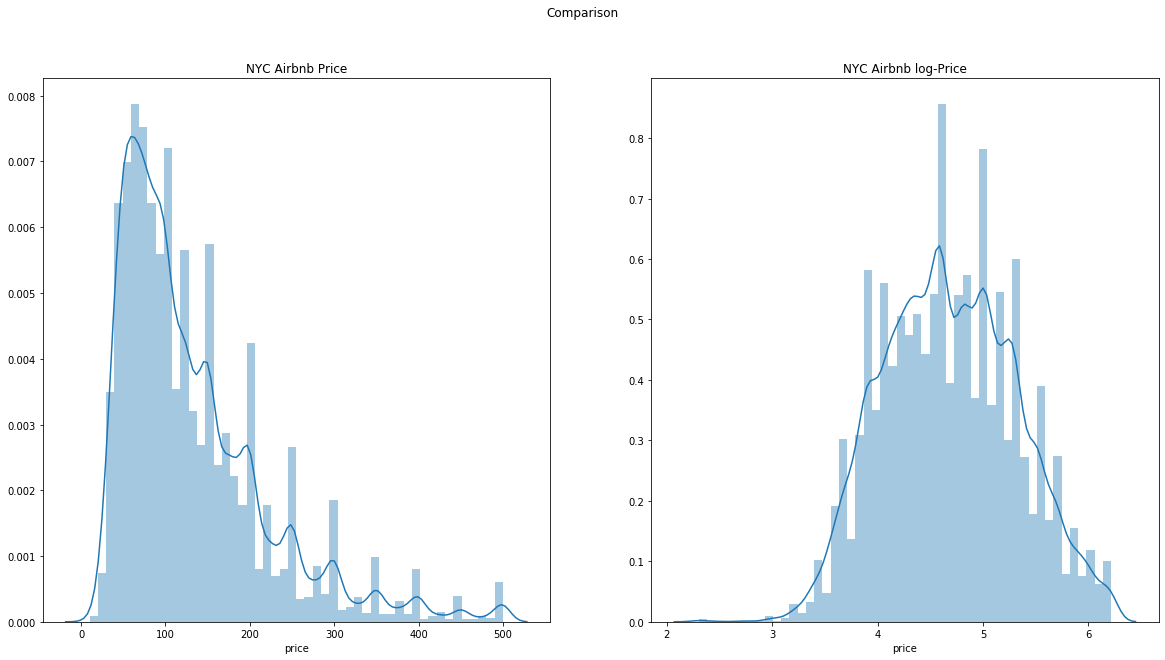

In [527]:
# Only price column would provide meanful distribution plot
# Plotting distribution for boroughs

# Distribution is slightly right skewed
# Log-transformation to create more normal distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Comparison')

sns.distplot(air_eda['price'], ax=ax1).set_title('NYC Airbnb Price')
sns.distplot(np.log(air_eda['price']), ax=ax2).set_title('NYC Airbnb log-Price')

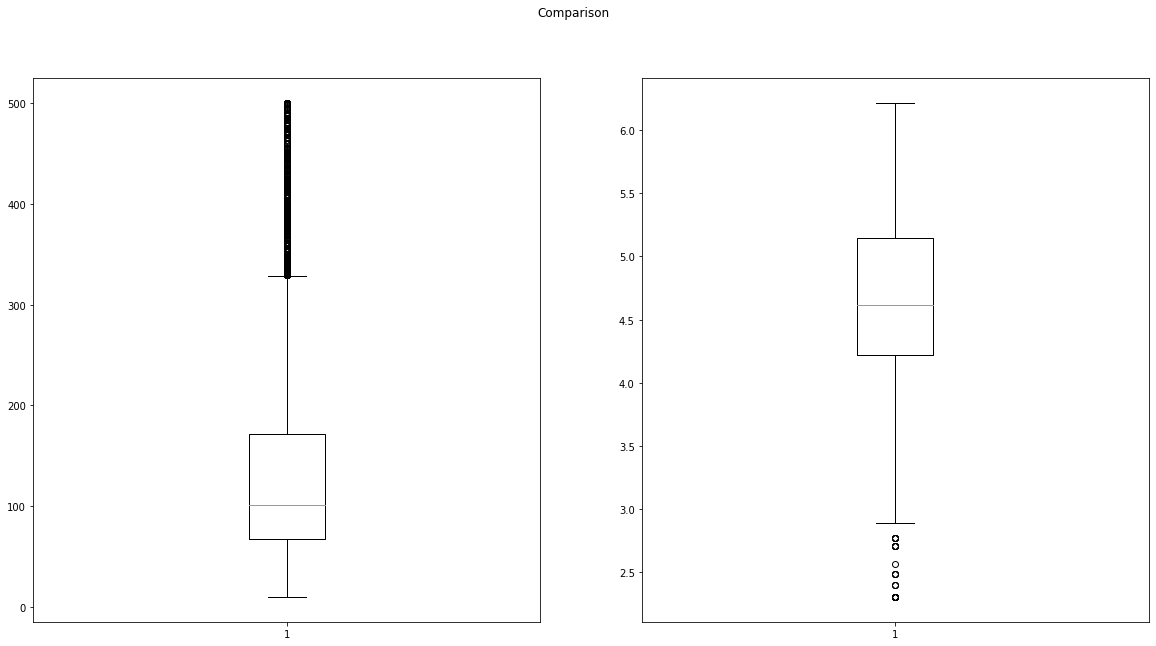

In [531]:
# Many outliers
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Comparison')

ax1.boxplot(air_eda['price'])
ax2.boxplot(np.log(air_eda['price']))
plt.show()

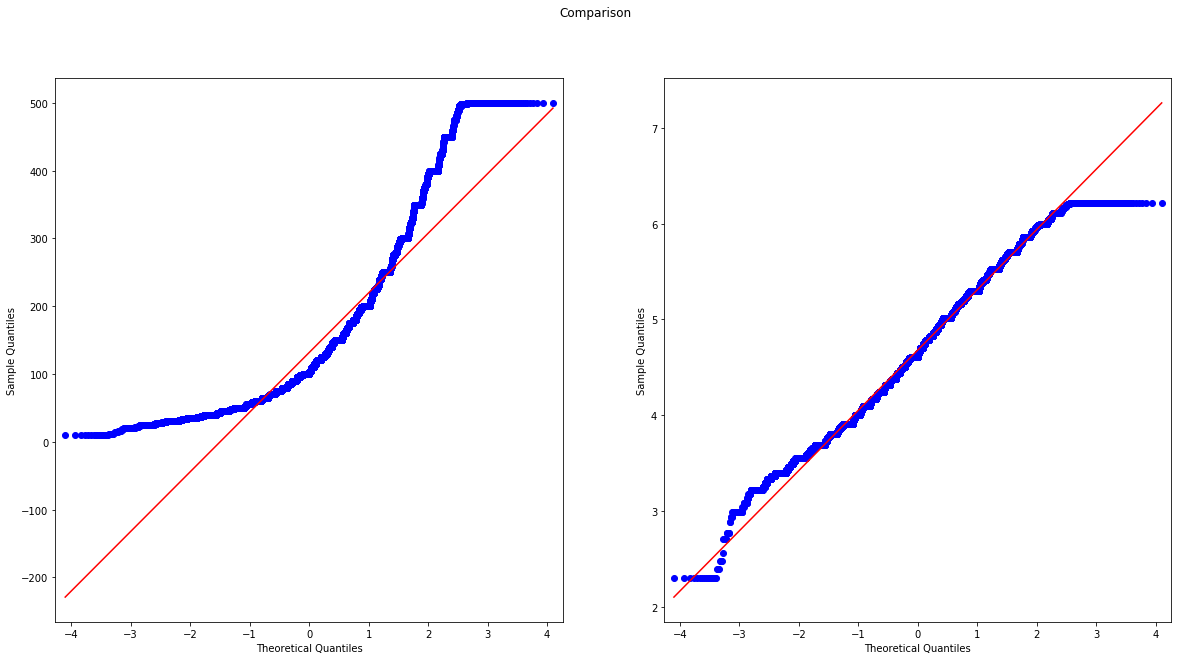

In [529]:
# The price column is not normal distributed
# Log transformation follows the QQ-plot
import statsmodels.api as sm

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
fig.suptitle('Comparison')

sm.qqplot(air_eda['price'], line='s', ax=ax1)
sm.qqplot(np.log(air_eda['price']), line='s', ax=ax2)
plt.show()

In [539]:
# Distribution of 5 different boroughs
boro = list(air_eda['boroughs'].unique())

for i in boro:
    print(i, air_eda.loc[air_eda['boroughs'] == i]['price'].describe())

Brooklyn count    19866.000000
mean       112.679251
std         75.613676
min         10.000000
25%         60.000000
50%         90.000000
75%        148.750000
max        500.000000
Name: price, dtype: float64
Manhattan count    20887.000000
mean       163.255805
std         95.114873
min         10.000000
25%         92.000000
50%        145.000000
75%        200.000000
max        500.000000
Name: price, dtype: float64
Queens count    5637.000000
mean       92.850807
std        64.053356
min        10.000000
25%        50.000000
50%        75.000000
75%       110.000000
max       500.000000
Name: price, dtype: float64
Staten Island count    367.000000
mean      91.144414
std       63.075143
min       13.000000
25%       50.000000
50%       75.000000
75%      105.500000
max      450.000000
Name: price, dtype: float64
Bronx count    1083.000000
mean       81.818098
std        60.748118
min        10.000000
25%        45.000000
50%        65.000000
75%        99.000000
max       500.0

In [540]:
# Distribution in the types of room
roomtype = list(air_eda['room'].unique())

for i in roomtype:
    print(i, air_eda.loc[air_eda['room'] == i]['price'].describe())

Private room count    22176.000000
mean        81.821744
std         51.117162
min         10.000000
25%         50.000000
50%         70.000000
75%         95.000000
max        500.000000
Name: price, dtype: float64
Entire home/apt count    24514.000000
mean       179.742882
std         88.519533
min         10.000000
25%        119.000000
50%        158.000000
75%        220.000000
max        500.000000
Name: price, dtype: float64
Shared room count    1150.000000
mean       63.628696
std        57.463611
min        10.000000
25%        33.000000
50%        45.000000
75%        75.000000
max       500.000000
Name: price, dtype: float64


#### Examining and plotting any correlation between variables

In [422]:
corr = air_eda.corr()
corr

,price,minimum_nights,number_of_reviews,monthly_reviews,host_listings,yearly_availability,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
price,1.000000,0.029189,-0.048237,-0.049534,0.163648,0.094630,-0.085979,-0.180712,0.316881,-0.160675,-0.040359,0.560976,-0.525108,-0.121083
minimum_nights,0.029189,1.000000,-0.080062,-0.124842,0.129113,0.144368,-0.017900,-0.039124,0.068442,-0.034705,-0.009333,0.077195,-0.076105,-0.004141
number_of_reviews,-0.048237,-0.080062,1.000000,0.589614,-0.072285,0.177573,0.008825,0.014996,-0.042863,0.034752,0.015497,-0.006975,0.014330,-0.023892
monthly_reviews,-0.049534,-0.124842,0.589614,1.000000,-0.047719,0.168563,0.036405,-0.024192,-0.061757,0.107734,0.027513,-0.027406,0.028046,-0.001873
host_listings,0.163648,0.129113,-0.072285,-0.047719,1.000000,0.227636,-0.022521,-0.123245,0.153251,-0.033542,-0.012748,0.113072,-0.109817,-0.011466
yearly_availability,0.094630,0.144368,0.177573,0.168563,0.227636,1.000000,0.063571,-0.075610,-0.013860,0.091597,0.058964,-0.014875,-0.003911,0.061277
Bronx,-0.085979,-0.017900,0.008825,0.036405,-0.022521,0.063571,1.000000,-0.128253,-0.133976,-0.055622,-0.013381,-0.050310,0.041138,0.030246
Brooklyn,-0.180712,-0.039124,0.014996,-0.024192,-0.123245,-0.075610,-0.128253,1.000000,-0.741844,-0.307986,-0.074095,-0.068967,0.074876,-0.018707
Manhattan,0.316881,0.068442,-0.042863,-0.061757,0.153251,-0.013860,-0.133976,-0.741844,1.000000,-0.321726,-0.077401,0.153473,-0.151714,-0.006904
Queens,-0.160675,-0.034705,0.034752,0.107734,-0.033542,0.091597,-0.055622,-0.307986,-0.321726,1.000000,-0.032134,-0.105128,0.097640,0.025184


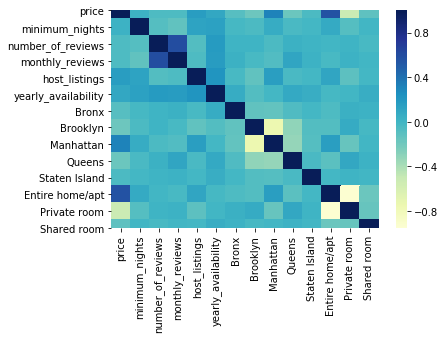

In [423]:
sns.heatmap(corr, 
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    cmap="YlGnBu",
    center=0)

#### Feature normalization and scaling

In [450]:
# Split into train an test data through 80/20 rule.
# Only utilizing relevant features.

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(air_eda[['number_of_reviews', 'host_listings', 'yearly_availability',
                                                         'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
                                                         'Entire home/apt','Private room', 'Shared room']],   
                                                air_eda[['price']], # input x=features, y=targets    
                                                test_size = 0.2) # set aside 30% for testing

In [442]:
# RobustScaler less prone to large outliers
from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
xTrain_rc = rc.fit_transform(xTrain)
yTrain_rc = rc.fit_transform(yTrain)

xTest_rc = rc.fit_transform(xTest)
yTest_rc = rc.fit_transform(yTest)

Xtest_rc = pd.DataFrame(xTest_rc,
                     columns=xTrain.columns)
Xtest_rc.describe()

,number_of_reviews,host_listings,yearly_availability,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,0.802130,6.461538,0.306780,0.023411,0.414820,0.438650,0.115907,0.007212,-0.485263,0.462479,0.022784
std,1.920240,34.283988,0.585105,0.151214,0.492717,0.496248,0.320130,0.084618,0.499809,0.498616,0.149223
min,-0.217391,0.000000,-0.191111,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,-0.173913,0.000000,-0.191111,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.826087,1.000000,0.808889,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,23.260870,326.000000,1.431111,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


# Model Implementation and Evaluation

#### Create your model
 - Log-Transformed Regression
 - Linear Regression

                                                  Log-Transformed Regression

In [517]:
# Log-Transformed Regression

from sklearn import linear_model

# instantiate the model object
lm = linear_model.LinearRegression()

# fit the model to the dataset
lm_train = lm.fit(xTrain, np.log(yTrain))

# make predictions
linear_preds = lm_train.predict(xTest)

In [492]:
air_eda_preds = pd.DataFrame(np.log(yTest))
air_eda_preds["preds"] = linear_preds
air_eda_preds.head()

,price,preds
38682,5.837730,5.407980
35958,3.912023,4.329522
25890,5.181784,5.358229
8626,3.912023,4.086790
9537,5.703782,5.189187


#### Visualize results with appropriate graphs

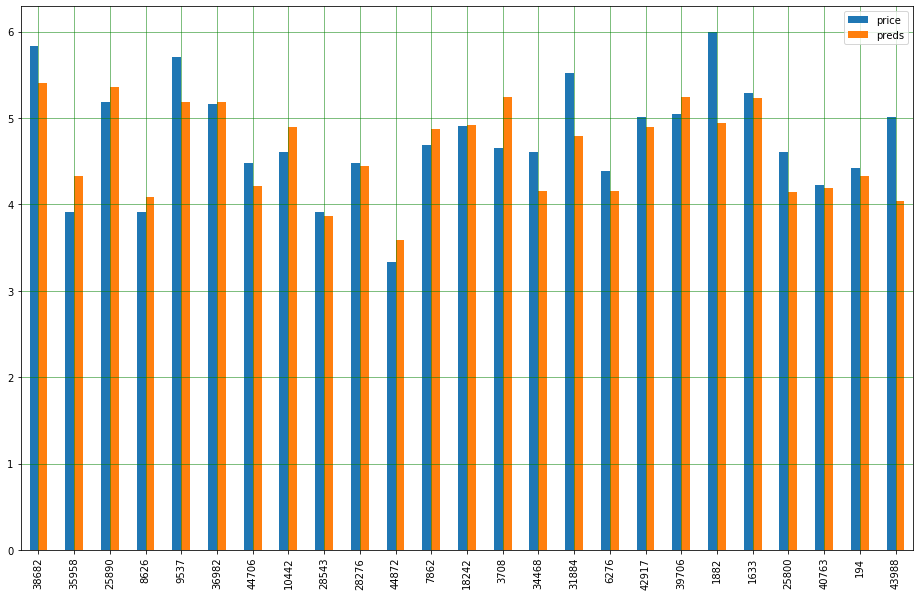

In [493]:
lm1 = air_eda_preds.head(25)
lm1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#### Examine error using the proper method for your model

In [494]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print('Mean Absolute Error:', mean_absolute_error(air_eda_preds.price, air_eda_preds.preds))  
print('Mean Squared Error:', mean_squared_error(air_eda_preds.price, air_eda_preds.preds))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(air_eda_preds.price, air_eda_preds.preds)))
print('R Square:', r2_score(air_eda_preds.price, air_eda_preds.preds))

Mean Absolute Error: 0.3403653443670758
Mean Squared Error: 0.1924205055599446
Root Mean Squared Error: 0.438657617692825
R Square: 0.5176161545481881


                                               Linear Regression

In [496]:
# Linear Regression

from sklearn import linear_model

# instantiate the model object
lm = linear_model.LinearRegression()

# fit the model to the dataset
lm_train = lm.fit(xTrain, yTrain)

# make predictions
linear_preds = lm_train.predict(xTest)

air_eda_preds = pd.DataFrame(yTest)
air_eda_preds["preds"] = linear_preds
air_eda_preds.head()

,price,preds
38682,343,240.853226
35958,50,92.312467
25890,178,220.878095
8626,50,59.617077
9537,300,191.894920


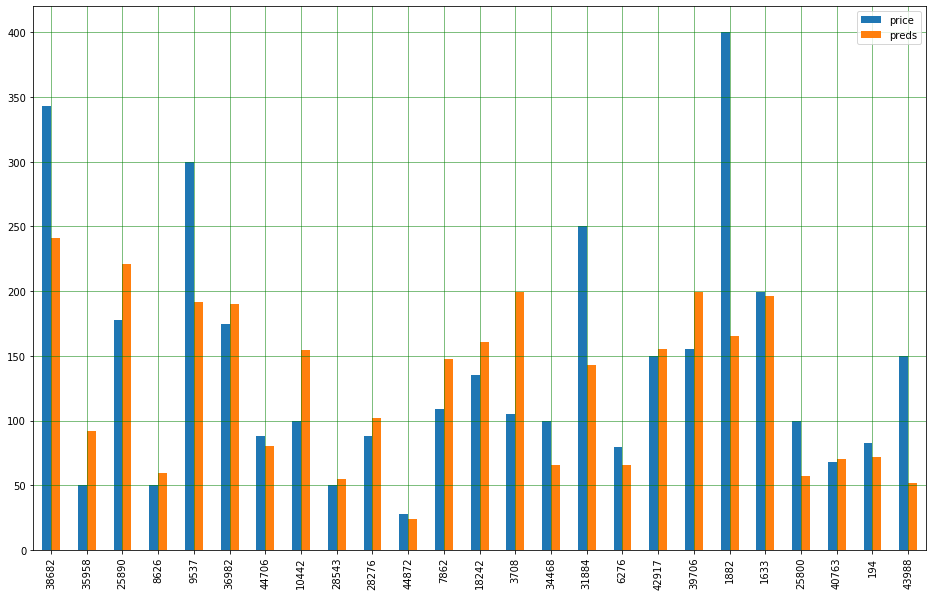

In [534]:
lm1 = air_eda_preds.head(25)
lm1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [497]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print('Mean Absolute Error:', mean_absolute_error(air_eda_preds.price, air_eda_preds.preds))  
print('Mean Squared Error:', mean_squared_error(air_eda_preds.price, air_eda_preds.preds))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(air_eda_preds.price, air_eda_preds.preds)))
print('R Square:', r2_score(air_eda_preds.price, air_eda_preds.preds))

Mean Absolute Error: 46.694328452089366
Mean Squared Error: 4633.485010472176
Root Mean Squared Error: 68.06970699563924
R Square: 0.40027237463417975


                                                    Conclusion

Based on the analysis of the NYC Airbnb dataset, by looking at the description of distribution in the target variable, price, there exists extreme outliers. The overall mean of price in NYC Airbnb  is \\$152.72, which is higher than the median at \\$106, suggesting a right skewed distribution. A minimum price at \\$0 could suggest a disaster relief program, and maximum price  at \\$10,000 per night suggest either a luxury apartment in the heart of NYC or the hosts are trying to upsell as much as possible. Therefore, in predicting price, the outliers should be removed. Using the 1.5 IQR rule, I calculated the lower bound and upper bound of the boxplot whisker, therefore any prices at \\$0 or above \\$334 are considered outliers. However, the price variable should retain certain outliers to distinguish the different average price in different boroughs. Since our bins contain maximum value of \\$500, it is a good cutting point where the desired boroughs will still offer at that price, and the less desired boroughs will less likely to offer at that price. After dropping the outliers, the average price is at $131.56 and still higher than median at \\$101, but the standard deviation has dropped significantly from \\$240 to \\$88, which gives more accurate prediction in price when it is not part of the outliers.

Looking at the visualization of the features, price has a right skewed distribution due to the extreme outliers. Therefore, it is important to do a log transformation on price and compare the two graphs. The log-price transformation gives a more normal distributed histogram. The boxplot and QQ-plot also show normal distribution for log-price transformation. There are interesting statistics in the different boroughs and room types, and how they affect overall price. Manhattan has the highest average price with \\$163, follow by Brooklyn at \\$112, Queens at \\$92, Staten Island at \\$91, and Bronx at \\$81. For room type, the highest average price is for an entire home or apartment at \\$179, follow by private room at $81 and shared room at \\$63. The heatmap and correlation matrix show that there is high correlation between number of reviews and monthly review because monthly review is a derived variable. Out of the five boroughs, there is a positive correlation that an increase in price might suggest the Airbnb is in Manhattan. There is also a high positive correlation that an increase in price might suggest an entire home or apartment, which can used to explain that more area costs more. The robust scaler helped scaled down price in percentile, therefore is not as prone to outliers as Min-Max or Max-Abs.

When implementing models, since it is not a binary or classification problem, I utilized linear regression for before and after log transformation. Visualizing the graphs can show that linear regression has a hard time predicting outliers, there is a high mean absolute error of 46.69, and high mean squared error of 4633, which is the squared distance  between the predicted and actual values. The R-square is also relatively low at 0.4, which shows the total variation explains by the model. However, transforming the target variable with log, there is a vast improvement in error. A log-transformed regression has a mean absolute error or 0.34 and mean squared error of 0.19. The R-square is also improved to 0.5176. There with less average error and higher variation in explaining the target variable, the log-transformed regression is better than a linear regression.
